Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000, Test samples: 25000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 268ms/step - accuracy: 0.5306 - loss: 0.6957 - val_accuracy: 0.7092 - val_loss: 0.5535
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 271ms/step - accuracy: 0.7106 - loss: 0.5757 - val_accuracy: 0.7694 - val_loss: 0.4834
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 268ms/step - accuracy: 0.7129 - loss: 0.5679 - val_accuracy: 0.6578 - val_loss: 0.5965
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - accuracy: 0.6459 - loss: 0.6548 - val_accuracy: 0.6328 - val_loss: 0.6243
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 273ms/step - accuracy: 0.7057 - loss: 0.5566 - val_accuracy: 0.6362 - val_loss: 0.6722

Test Accuracy: 64.01%


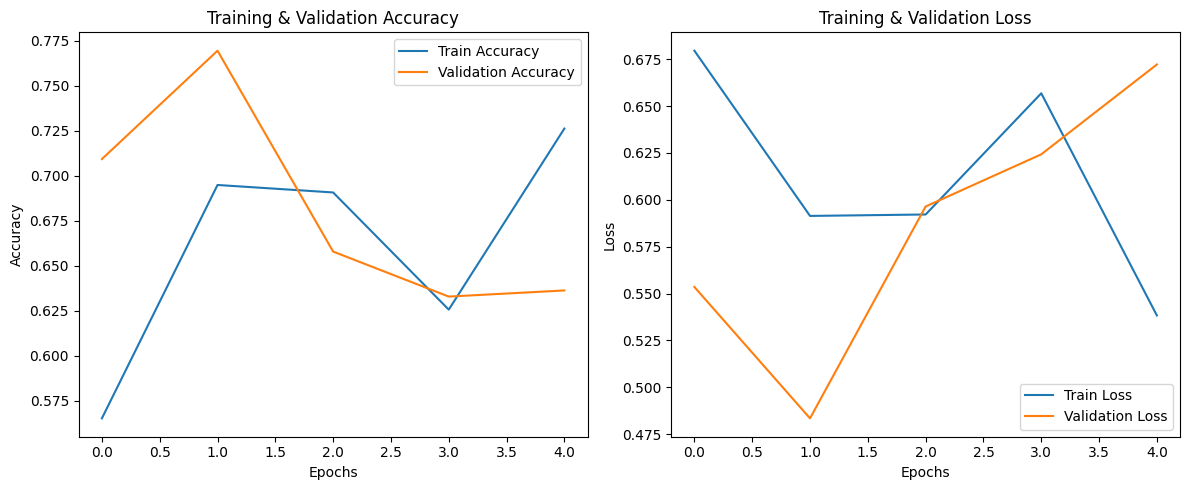

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step


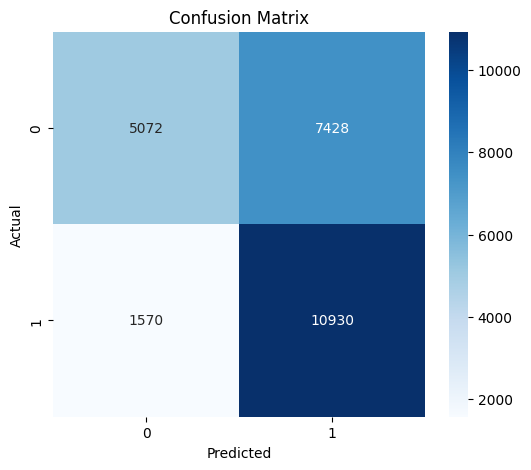


Classification Report:

              precision    recall  f1-score   support

    Negative       0.76      0.41      0.53     12500
    Positive       0.60      0.87      0.71     12500

    accuracy                           0.64     25000
   macro avg       0.68      0.64      0.62     25000
weighted avg       0.68      0.64      0.62     25000



In [1]:
# ===========================================================
# RNN FOR SENTIMENT ANALYSIS (SEQUENCE TO SINGLE OUTPUT)
# ===========================================================

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ===========================================================
# 1. LOAD AND PREPARE THE IMDB DATASET
# ===========================================================
vocab_size = 10000   # use top 10,000 most frequent words
maxlen = 200         # pad/truncate each review to 200 words

print("Loading IMDB dataset...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")

# ===========================================================
# 2. BUILD THE RNN MODEL
# ===========================================================
model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    SimpleRNN(128, activation='tanh', return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ===========================================================
# 3. TRAIN THE MODEL
# ===========================================================
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# ===========================================================
# 4. EVALUATE THE MODEL
# ===========================================================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# ===========================================================
# 5. PLOT TRAINING PERFORMANCE
# ===========================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ===========================================================
# 6. CONFUSION MATRIX & REPORT
# ===========================================================
y_pred = (model.predict(x_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
